### quicksorting
Try to implement the quicksort algorithm (detailed below)
```
Choose any element of the array to be the pivot.
  Divide all other elements (except the pivot) into two partitions.
  All elements less than the pivot must be in the first partition.
  All elements greater than the pivot must be in the second partition.
  Use recursion to sort both partitions.
  Join the first sorted partition, the pivot, and the second sorted partition.
```

Apply your implementation on an array of your own type (e.g. Persons). What do you need to think about? Also, think about efficiency.

In [8]:
function qsort(A)
    if length(A) == 1
        return A
    elseif length(A) == 0
        return A
    end
    less = []
    equal = []
    greater = []
    pivot = A[end]
    #println("pivot: $pivot")
    for item in A
        if item < pivot
            push!(less,item)
            # println("$item is less than $pivot")
        elseif item > pivot
            push!(greater,item)
        elseif item == pivot
            push!(equal,item)
        end
    end
    #println("less: $less")
    return vcat(qsort(less),equal,qsort(greater))
end

qsort([1,4,3,3,5,2])

6-element Array{Any,1}:
 1
 2
 3
 3
 4
 5

### Playing darts
We devide a darts boards in $n$ sections. Each section be considered as equiprobable. The points for each section are input values. 

For a given amount of darts $k$, determine all the possible combinations to obtain a score $S$. If it is not possible to obtain a certain score with $k$ darts, you should detect this.


_Remark:_ we assume that the players are skilled enough and never miss the target.

In [21]:
# works, but not an optimal implementation
function recscore(scores,smax,ndarts,arr=[], matches = [])
    if length(arr) == 0
        for score in scores
            recscore(scores,smax,ndarts,vcat(arr,[score]),matches)
        end
    elseif length(arr) <= ndarts
        # stop condition(s)
        if sum(arr) > smax
           return
        elseif sum(arr) == smax && length(arr) == ndarts
                    #println(arr)
            push!(matches,arr)
        # recursive solution
        elseif sum(arr) < smax
            for score in scores
                recscore(scores,smax,ndarts,vcat(arr,[score]),matches)
            end
        end
    end
    unique(sort!.(matches))
end
      
scores = [1,2,3,4,5,6,7]
smax = 20
recscore(scores,smax,4)

13-element Array{Array{Any,1},1}:
 [1, 5, 7, 7]
 [1, 6, 6, 7]
 [2, 4, 7, 7]
 [2, 5, 6, 7]
 [2, 6, 6, 6]
 [3, 3, 7, 7]
 [3, 4, 6, 7]
 [3, 5, 5, 7]
 [3, 5, 6, 6]
 [4, 4, 5, 7]
 [4, 4, 6, 6]
 [4, 5, 5, 6]
 [5, 5, 5, 5]

### Road simulation
* We study a single track road on which cars are moving.
* For simplicity's sake, each car has one of 8 discrete velocities (i.e. 0, 1, ... 7)
* To avoid collisions behave according to the following rules:
    * The road is divided in discrete cases. 
    * When a car drives at velocity 1, it moves one case in one timestep
    * a car changes its velocity in the following way: if there are only $n$ cases available ($n\le7$), the car will change its velocity to match the amount of available cases. If there are more than the current velocity cases available, the car will accelerate by one case.

Think about:
* is this approach realistic? 
* what about case sizes?
* what happens when the car leaves the road?


In [ ]:
mutable struct Car
    id::Int
    v::Int
    pos::Int
end

struct Road
    locs::Array
    vmax::Int
    cars::Dict{Int,Car}
    function Road(ncases=100,vmax = 7)
        new(zeros(Int,ncases),vmax,Dict{Int,Car}())
    end
end

function addcar!(r::Road,c::Car)
    r.locs[c.pos] = c.id
    r.cars[c.id] = c
    nothing
end

#to do: propor handling of road bounds
function freespaces(r::Road,c::Car)
    n = 0
    try
        for el in r.locs[c.pos+1:c.pos+r.vmax]
            if el ≠ 0
                break
            else
                n+=1
            end
        end
    catch
        println("out of bounds, asuming infinite space")
        n = r.vmax
    end
    return n
end

function newspeed(r::Road)
    for car in values(r.cars)
        free  = freespaces(r,car)
        if car.v < free && car.v ≠ r.vmax
            car.v += 1
        elseif car.v < free && car.v == r.vmax
            car.v = r.vmax
        else
            car.v = free
        end 
    end
end
                
# to add: update position of cars.

### Langton's ant
Langton's ant is a cellular automaton that models an ant sitting on a plane of cells, all of which are white initially, the ant facing in one of four directions. Each cell can either be black or white. The ant moves according to the color of the cell it is currently sitting in, with the following rules:

* If the cell is black, it changes to white and the ant turns left;
* If the cell is white, it changes to black and the ant turns right;
* The ant then moves forward to the next cell, and repeat from step 1.

This rather simple ruleset leads to an initially chaotic movement pattern, and after about 10000 steps, a cycle appears where the ant moves steadily away from the starting location in a diagonal corridor about 10 cells wide. Conceptually the ant can then walk infinitely far away.


In [38]:
import Base.show

mutable struct Ant
    orientation
    position
end
function show(io::IO,a::Ant)
    print(io,"Ant: orientation = $(a.orientation*180/pi), position = $(a.position)")
end

mutable struct Cell
    position
    color::Bool
end
function show(io::IO,c::Cell)
    print(io,"Location: $(c.position): $(c.color)")
end

mutable struct World
    a::Ant
    cells::Dict
end
function show(io::IO,w::World)
    println(io,"Current world state:")
    println(io,"$(w.a)")
    for (key,val) in w.cells
        println(io,"$key: $(val.color)")
    end
end

function updateworld(w::World,a::Ant)
    # get current from ant position
    pos = w.cells[a.position]
    # behavior of the ant
    if pos.color # implying true, thus colored
        a.orientation += (pi/2)%(2*pi)
    else
        a.orientation -= (pi/2)%(2*pi)
    end
    # changing color of current location
    w.cells[a.position].color = !(w.cells[a.position].color)
    # moving ant
    a.position = (a.position[1]+round(cos(a.orientation)), a.position[2]+ round(sin(a.orientation)))
    # add new position in dictionary if not knwon before (defaults to white cell)
    get!(w.cells,a.position,Cell(a.position,false))
end

updateworld (generic function with 1 method)

In [255]:
using Luxor
function drawworld(w::World,maxwidth::Int)
    # get cell coordinates and values
    x,y,val = [],[],[]#k = keys(w.cells)
    for key in keys(w.cells)
        push!(x,key[1])
        push!(y,key[2])
        push!(val,w.cells[key].color)
    end
    # find min/max and map it all
    xmin = minimum(x)
    ymin = minimum(y)
    if xmin <=0
        x = x .+ abs(xmin)
    else
        x = x .- abs(xmin)
    end
    if ymin <=0
        y = y .+ abs(ymin)
    else
        y = y .- abs(ymin)
    end
    xmax = maximum(x)
    ymax = maximum(y)
    width = maxwidth / (xmax+1)
    #println(maxwidth / (xmax+1)        )
            
    # make drawing
    Luxor.Drawing(maxwidth,maxwidth,"out.svg")
    for i in 1:length(x)
        if val[i]
            sethue("black")
        else
            sethue("lightgrey")
        end
        Luxor.rect(x[i]/(xmax+1)*maxwidth,y[i]/(xmax+1)*maxwidth,width,width,:fill)
    end
    # add the ant
    sethue("red")
    Luxor.circle(w.a.position[1]/(xmax+1)*maxwidth+width/2,
                 w.a.position[2]/(xmax+1)*maxwidth+width/2,
                 width/2,:fill)
    # end drawing ()
    Luxor.finish()
    Luxor.preview()
end

drawworld (generic function with 2 methods)

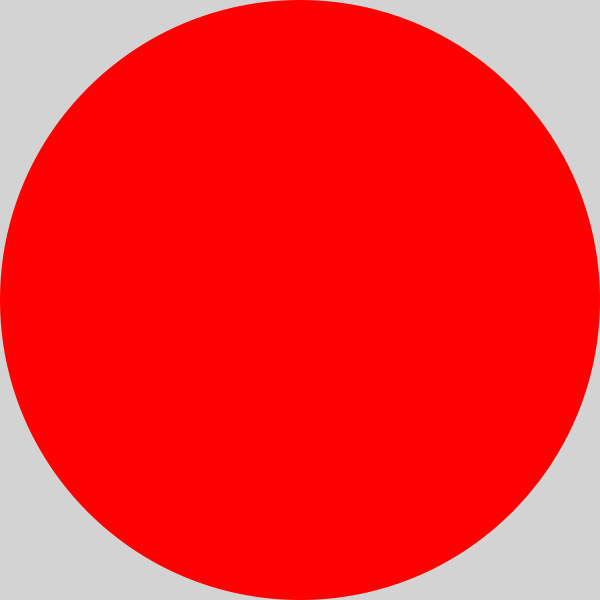

In [354]:
# initiate the ant
a = Ant(pi/2,(0,0))
println(a)
# initiate the world based on the ant's position
w = World(a,Dict(a.position=>Cell(a.position,false)))
# illustration
drawworld(w,600)

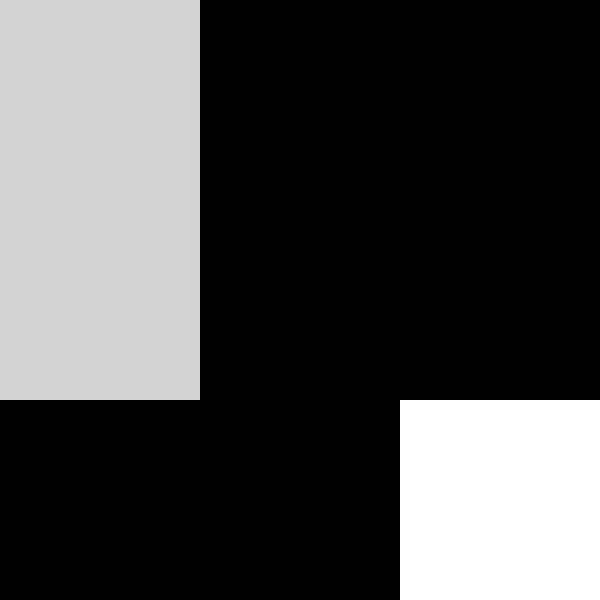

In [267]:
for i in 1:10
    updateworld(w,a)
end
drawworld(w,600);

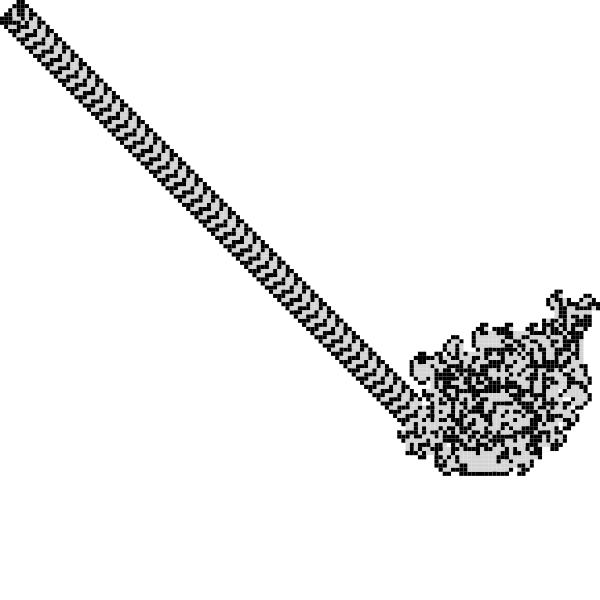

In [268]:
for i in 1:15000
    updateworld(w,a)
end
drawworld(w,600);

### Pagination
Suppose you run a query, but the amount of results is large. For overview, you want to be able to return the values in partial lists of a given length (this is similar to google's search results, you only see $\pm10$ results per page).

_Example:_
* Suppose our list is [one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,thirtheen,fourtheen,etc.] 
and we show only five results per page. 
* The first page would only show [one,two,three,four,five], the seconde page would shouw [six,seven,eight,nine,ten] and so on.

Implement this. You should be able to select the amount of items per page, return the first and last page, but also inlcude some sort of next/previous page operation.

In [350]:
import Base.show
mutable struct Pagination
    data
    npage::Int
    currentpage::Int
    function Pagination(data,npage=10)
        new(data,npage,1)
    end
end
function show(io::IO,p::Pagination)
    print(io,"Pagination for $(length(p.data)) items, $(p.npage) results per page")
end

function firstpage(p::Pagination)
    p.currentpage = 1
    showpage(p,1)
end

function lastpage(p::Pagination)
    maxpage = length(p.data)÷p.npage + 1
    p.currentpage = maxpage
    showpage(p,maxpage)
end

function previous(p::Pagination)
    try
        showpage(p,p.currentpage-1)
    catch
        error("Pagenumer out of bounds")
    end
end

function next(p::Pagination)
    try
        showpage(p,p.currentpage+1)
    catch
        error("Pagenumer out of bounds")
    end
end

function showpage(p::Pagination,pnumb = 1)
    # check maxsize
    maxpage = length(p.data)÷p.npage + 1
    #println("maxpage= $maxpage")
    if pnumb > maxpage
        error("Pagenumber out of bounds")
    end
    
    p.currentpage = pnumb
    
    for i in (pnumb-1)*p.npage+1 : min((pnumb)*p.npage,length(p.data))
        println(p.data[i])
    end
end
    

showpage (generic function with 2 methods)

In [345]:
data = collect(1:47)
npage = 10
p = Pagination(data,npage)

Pagination for 47 items, 10 results per page

In [353]:
firstpage(p)
next(p)
next(p)
previous(p)
lastpage(p)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
11
12
13
14
15
16
17
18
19
20
41
42
43
44
45
46
47
